# 라이브러리


## 설치

In [1]:
pip install pandas seaborn numpy

## 호출

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

# 시각화

## Case1 : 모든 센싱 데이터

In [3]:
# Load CSV data into a DataFrame
file_name = 'Sensor_data_0928214430.csv' # input data file
df = pd.read_csv(file_name, header= 0)
df.head()

,Sensor1,Sensor2,Sensor3
0,37,1,534
1,37,1,535
2,37,1,534
3,37,1,532
4,37,1,532


In [8]:
df

,Sensor1,Sensor2,Sensor3
0,37,1,534
1,37,1,535
2,37,1,534
3,37,1,532
4,37,1,532
...,...,...,...
95,38,1,576
96,38,1,571
97,38,1,584
98,38,1,565


from matplotlib import pyplot as plt
df['Sensor1'].plot(kind='hist', bins=20, title='Sensor1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Sensor3'].plot(kind='hist', bins=20, title='Sensor3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Sensor1', y='Sensor3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sensor2']
  ys = series['Sensor1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Sensor2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sensor2')
_ = plt.ylabel('Sensor1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sensor2']
  ys = series['Sensor3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Sensor2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sensor2')
_ = plt.ylabel('Sensor3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Sensor2']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Sensor2'}, axis=1)
              .sort_values('Sensor2', ascending=True))
  xs = counted['Sensor2']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Sensor2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sensor2')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Sensor1'].plot(kind='line', figsize=(8, 4), title='Sensor1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Sensor3'].plot(kind='line', figsize=(8, 4), title='Sensor3')
plt.gca().spines[['top', 'right']].set_visible(False)

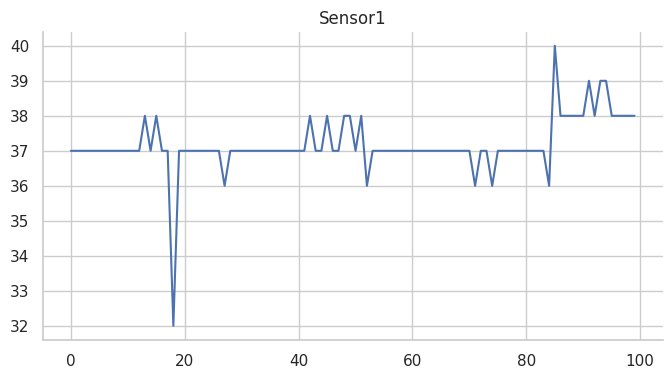

In [9]:
from matplotlib import pyplot as plt
df['Sensor1'].plot(kind='line', figsize=(8, 4), title='Sensor1')
plt.gca().spines[['top', 'right']].set_visible(False)

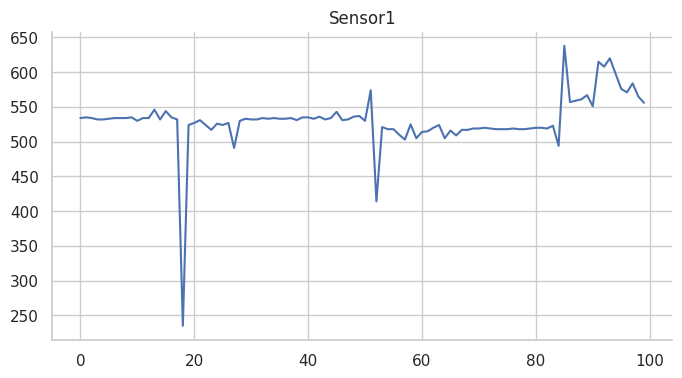

In [11]:
df['Sensor3'].plot(kind='line', figsize=(8, 4), title='Sensor1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
df['Index'] = df.index

In [14]:
df.head(3)

,Sensor1,Sensor2,Sensor3,Index
0,37,1,534,0
1,37,1,535,1
2,37,1,534,2


In [12]:
# Set seaborn theme
sns.set_theme(style="whitegrid")

<Axes: xlabel='Index', ylabel='Sensor1'>

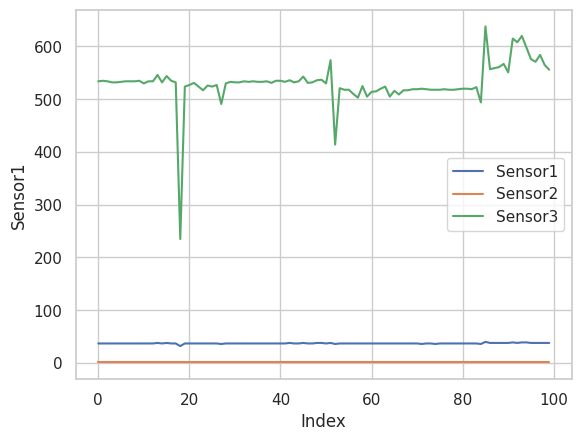

In [15]:
# Plot all sensor data on a single graph using seaborn's lineplot
sns.lineplot(data=df, x='Index', y='Sensor1', label='Sensor1')
sns.lineplot(data=df, x='Index', y='Sensor2', label='Sensor2')
sns.lineplot(data=df, x='Index', y='Sensor3', label='Sensor3')

<Axes: xlabel='Index', ylabel='Sensor1'>

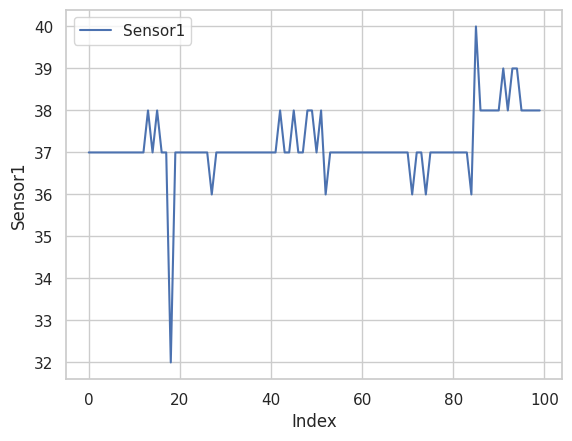

In [16]:
sns.lineplot(data=df, x='Index', y='Sensor1', label='Sensor1')

<Axes: xlabel='Index', ylabel='Sensor3'>

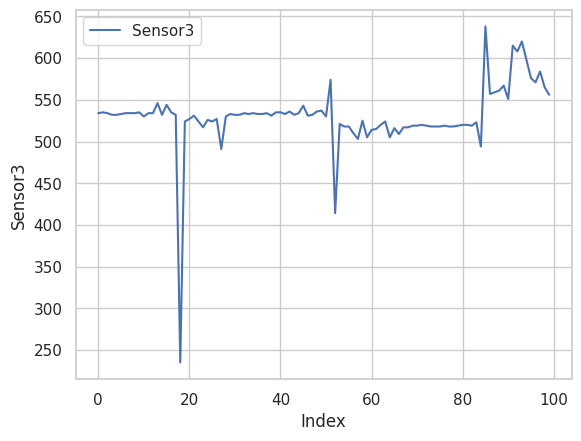

In [17]:
sns.lineplot(data=df, x='Index', y='Sensor3', label='Sensor3')

## Case2 : 각각 표현

In [18]:
df_melted = df.melt(id_vars=['Index'], var_name='Sensor', value_name='Value')

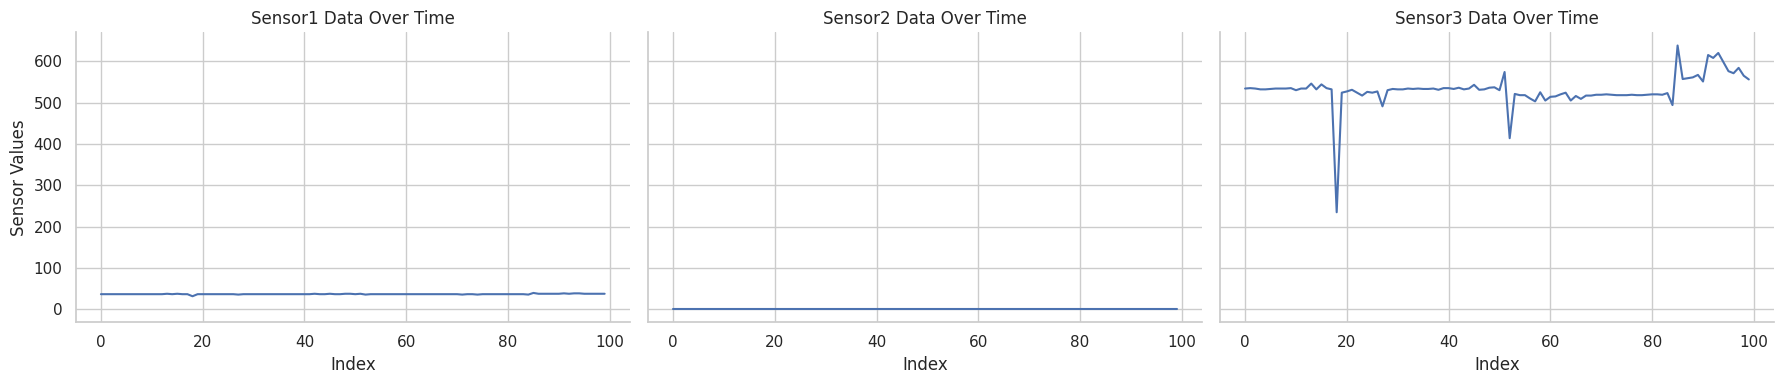

In [21]:
# Plot each sensor data in a separate subplot
g = sns.relplot(
    data=df_melted,
    x='Index', y='Value',
    kind='line',
    col='Sensor',
    col_wrap=3,  # Adjust this based on the number of sensors
    height=4,
    aspect=1.5
)
# Set the titles and remove spines
g.set_titles("{col_name} Data Over Time")
g.set_axis_labels("Index", "Sensor Values")
sns.despine(top=True, right=True)